<h1>               Diagnosing Heart Disease with ML          </h1>


<h2>Introduction</h2>

The main objective of this kernel is make sure even a naive person without having much of ml knowledge can understand what was going and after completing this notebook i am confident that you can build your own ml models.Be confident and don't bother by seeing the size of this notebook it contains pure simple language so everyone can understand it......I explained each and every step of ML model building...
So please spend time and try it complete it ....If there are any suggestions you can mention it in comments and in the middle of the notebook you will some links please checkout those links also......

If you find this notebook useful please upvote it.

<h2>Data Science in Medical Field :-</h2>

In the future days the Data Science could play an important role in Medical Field.Like many fields it's going to transform the medical
field also.Of all the applications of machine-learning, diagnosing any serious disease using a model is always going to be a hard thing. If the output from a model is the particular course of treatment (potentially with side-effects), or surgery, or the absence of treatment, people are going to want to know why we should trust that model or it's result.So we need the best models to apply in the field of medical.

Now In this kernel we will build a baseline model for the prediction of whether the given person has heart disease or not.

We will do this step by step from  Exploratory Data Analysis to Validation of Model.I will try to make every concept very clear for you
to understand in simple language and please upvote it if you find it useful.

Now we will first look at the basic workflow that everyone should follow in the model building:-

**1)Primary thing is collecting the data** and as for now we have the large datasets to work on ... so it's not an problem. 


**2)Next thing is data preprocessing** and it is the most important phase of all phases:It includes:-

      2.1) Analysis of features(knowing the meaning of each and every feature).

      2.2) Finding or Exploring all the trends between the features(using different kinds of plots gives an insight into the given data).
    
      2.3) Adding new features by combining given features(if they seem to be helpful)
  
      2.4) Removing redundant features(Features which may have no effect on output of the model)
  
      2.5) Converting all the features into suitable form for modelling(I'll explain in depth about this later on).


**3)Researching the model that will be best for the type of data**

       3.1)checking out on all the algorithms we know and tuning the parameters.
   

**4)Training and testing the model**

       4.1) Cross Validation.
   

**5)Evaluation**
    
       5.1) Plotting ROC Curve, Precision/Recall Curve, AUC
   
       5.2) Model Comparison (Accuracy + F1 Score)
   

**6)optional(ensemble)**

       6.1) Then we can ensemble the best models we got into a powerful model....
       
       6.2) Important Features Extraction(To best explain the model with explanitory resources of ml).

So now let's start....


<h2>1.Gathering the data:-</h2>

We are going to use Heart Disease UCI Dataset and let's load the libraries that we need:-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color=sns.color_palette()#helps to give colors to the plots
import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning

Now load the dataset..

In [2]:
dt=pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<h3>2.1)Analysis of features:-</h3>

Now know some details about every feature:-

    age: The person's age in years
    sex: The person's sex (1 = male, 0 = female)
    cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
    trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
    chol: The person's cholesterol measurement in mg/dl
    fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
    restecg: Resting electrocardiographic measurement (0,1,2)
    thalach: The person's maximum heart rate achieved
    exang: Exercise induced angina (1 = yes; 0 = no)
    oldpeak: ST depression induced by exercise relative to rest 
    slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
    ca: The number of major vessels (0-3)
    thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
    target: Heart disease (0 = no, 1 = yes)
   
If you are interested find some more information on each of these features:-

In [3]:
dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<h3>2.2)Finding or Exploring all the trends between features:-</h3>

If you are interested please check out the wonderful course on coursera:-[Data visualization](https://www.coursera.org/learn/python-plotting/home/welcome) gives all the insights on plotting and visualization or check out mini courses in kaggle

<h4>Let's check how many people in total have heart problems with respect to all people in dataset</h4>

Text(0.5, 1.0, 'Frequency of people having heart diseases')

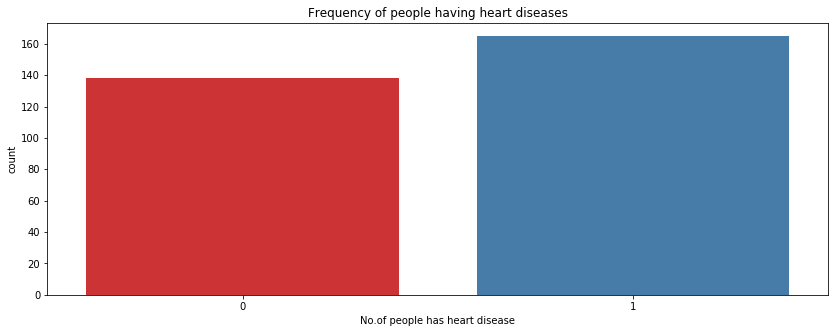

In [4]:
fig,ax=plt.subplots(1,1,figsize=(14,5))#fig-specifies whole graph whereas ax represents the subplot that are in graph as:-ax
#count of people having diseases
sns.countplot(data=dt,x='target',ax=ax,palette='Set1')
ax.set_xlabel("No.of people has heart disease")
ax.set_ylabel("count")
ax.set_title("Frequency of people having heart diseases")


well...we see that more than half of the people in the dataset are suffering from heart diseases...So now let's try to be precise.Let's find the percentage of people who are suffering from heart diseases by using autopct argument in pie plot we can have that..

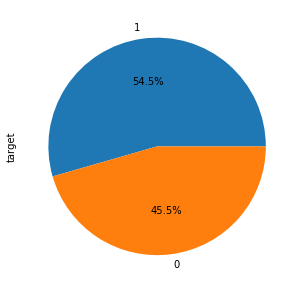

In [5]:
fig,ax=plt.subplots(1,1,figsize=(7,5))
dt['target'].value_counts().plot.pie(ax=ax,autopct='%1.1f%%')#or we can have explode parameter to have some separation between two

So 54.5% people are suffering from heart diseases...oh well let's now look into other insights.Now on further we will plot the above two plots in only plot by using subplots() by specifying arguments as 1,2 specify 1 row 2 columns that means in one row we will have 2 diagramas....

<h3>Sex Feature:-</h3>

Text(0.5, 1.0, 'male vs female survived')

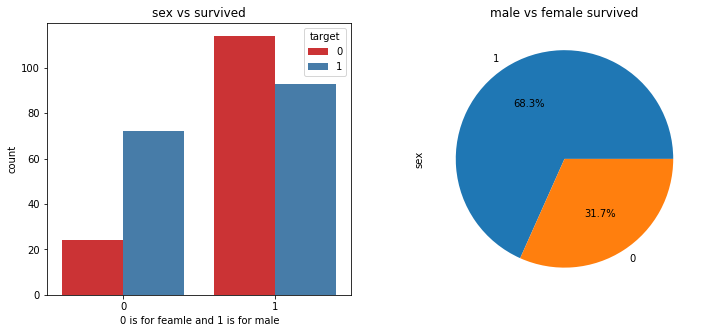

In [6]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.countplot(data=dt,x='sex',hue='target',palette='Set1',ax=ax[0])
ax[0].set_xlabel("0 is for feamle and 1 is for male")
ax[0].set_ylabel("count")
dt['sex'].value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%')
ax[0].set_title("sex vs survived")
ax[1].set_title("male vs female survived")

There the blue bar shows how many have disease and the red shows whom donot have disease and the first pair of bars are feamle and the next are male .....

so we conclude men population is more .... and 3 in 4 women has heart disease .... so this feature is very useful

<h3>Now explore cp(chest pain){0,1,2,3} (category):-</h3>

Text(0.5, 1.0, 'cp category vise percentage')

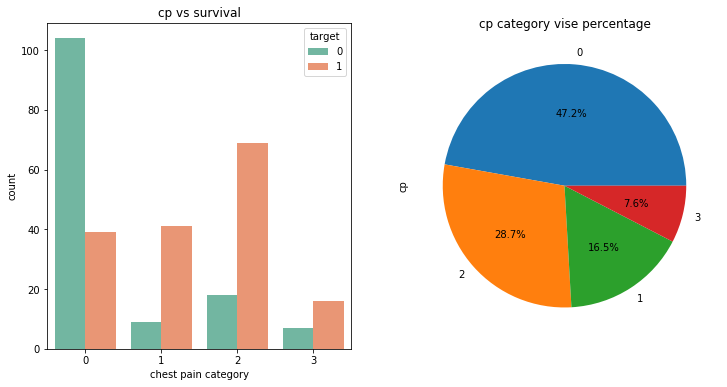

In [7]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot(data=dt,x='cp',hue='target',palette="Set2",ax=ax[0])
ax[0].set_xlabel("chest pain category")
ax[0].set_ylabel("count")
ax[0].set_title("cp vs survival")
dt['cp'].value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%')
ax[1].set_title("cp category vise percentage")

so if category is 0 they are mostly safe but if they are of 1 or 2 or 3 category they are more prone to heart disease.So this feature is useful for model.Here most important thing very few people could get through the 2nd level of chest pain most people will die here so the safe side is o level chest pain people and remaining all levels of people are prone to heart diseases.

<h3>Now we will explore  resting electrocardiographic results(restecg){0,1,2}(category):-</h3>

Text(0.5, 1.0, 'resting electrocardiographic')

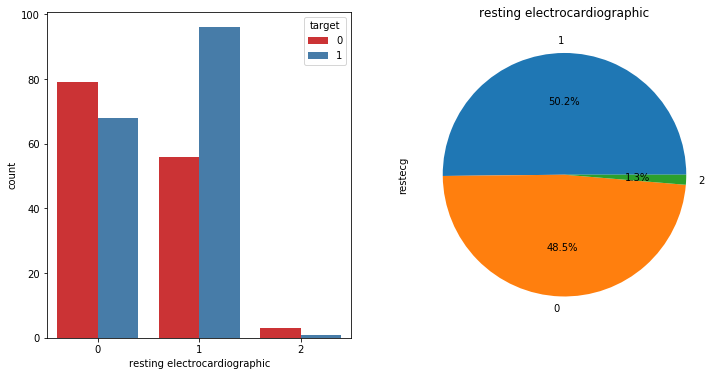

In [8]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot(x='restecg',data=dt,hue='target',palette='Set1',ax=ax[0])#different sets gives different colors
ax[0].set_xlabel("resting electrocardiographic")
dt.restecg.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%')
ax[1].set_title("resting electrocardiographic")

(0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

Here people having ST-T wave abnormality are more prone to the heart diseases.An electrocardiogram (ECG) is a test which measures the electrical activity of your heart to show whether or not it is working normally. An ECG records the heart's rhythm and activity on a moving strip of paper or a line on a screen

<h3>Let's explore fasting blood sugar (Fbs) (Category)</h3>

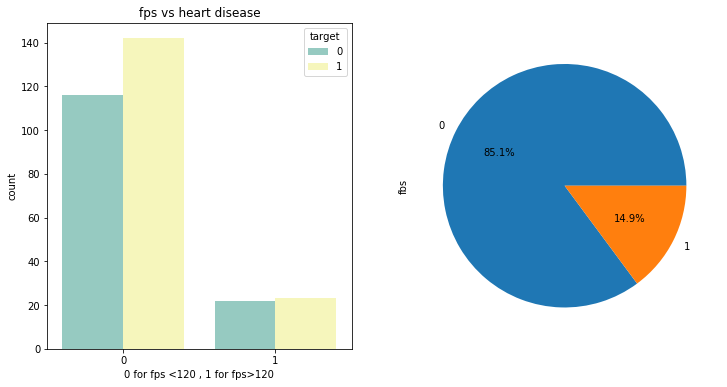

In [9]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot(data=dt,x='fbs',hue='target',ax=ax[0],palette="Set3")
ax[0].set_xlabel("0 for fps <120 , 1 for fps>120")
ax[0].set_ylabel("count")
ax[0].set_title("fps vs heart disease")
dt['fbs'].value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%')

so we can see that people having fbs<120 are more prone to heart diseases and also the number of people in this category are more

<h3>The number of major vessels</h3>

Let's explore this..

Text(0.5, 1.0, 'number of major vessels colored by flourosopy')

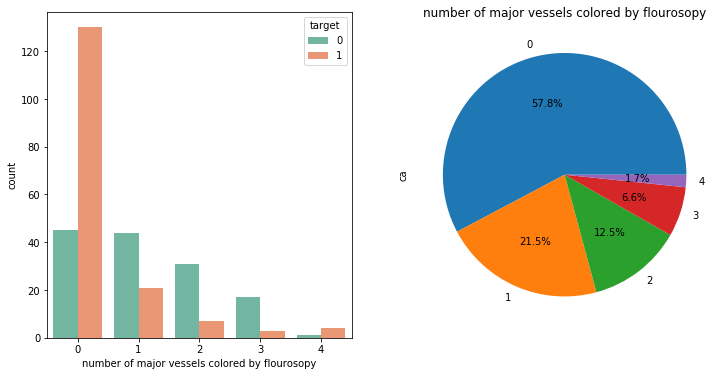

In [10]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot(x='ca',data=dt,hue='target',palette='Set2',ax=ax[0])
ax[0].set_xlabel("number of major vessels colored by flourosopy")
dt['ca'].value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%')
ax[1].set_title("number of major vessels colored by flourosopy")

We can see that if the number of vessels are 0 then that person is most prone to heart diseases when compared to remaining other cases

<h3>Let's explore the slope of the peak exercise ST segment (slope)(Category)</h3>

Text(0.5, 1.0, 'slope of peaks')

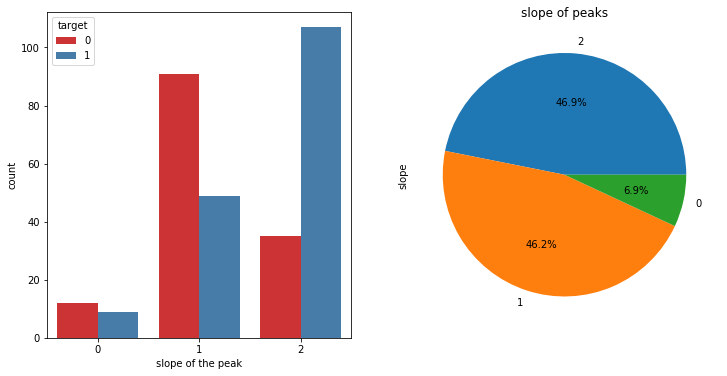

In [11]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot(data=dt,x='slope',palette='Set1',hue='target',ax=ax[0])
ax[0].set_xlabel('slope of the peak')
dt['slope'].value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%')
ax[1].set_title('slope of peaks')

Wow....we got a great insight here that if the person slope value is 2 than he's mostly likely to suffer with heart disease.

<h3>thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)</h3>

Text(0.5, 1.0, 'thalassemia levels')

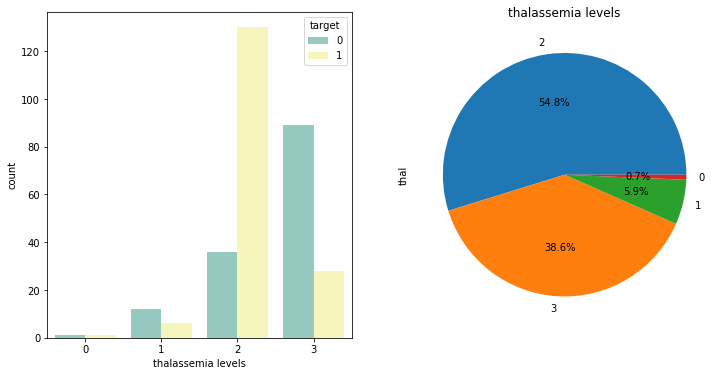

In [12]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot(data=dt,x='thal',hue='target',palette='Set3',ax=ax[0])
ax[0].set_xlabel("thalassemia levels")
dt['thal'].value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%')
ax[1].set_title('thalassemia levels')

people having fixed defect(6) tends be prone to heart diseases.And this shows a great value to our model as more people having this fixed defect are prone to heart diseases.

Wow...Now we have just completed our analysis on categorical data ...now move on to the continuous data.

Continuous data can be explored using the scatter plots,histograms,headmaps,swarmplots etc..,. and we can't do with count plots,pie charts etc.,. as they tend to more values.

<h3>Trestbps (Resting blood pressure)</h3>

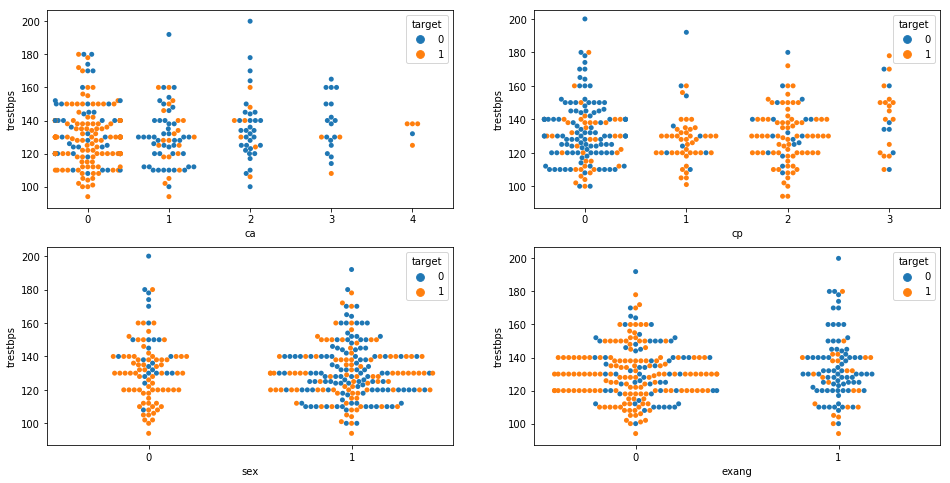

In [13]:
fig,ax=plt.subplots(2,2,figsize=(16,8))
sns.swarmplot(y='trestbps',x='ca',hue='target',data=dt,ax=ax[0,0])
sns.swarmplot(y='trestbps',x='sex',hue='target',data=dt,ax=ax[1,0])
sns.swarmplot(y='trestbps',x='cp',hue='target',data=dt,ax=ax[0,1])
sns.swarmplot(y='trestbps',x='exang',hue='target',data=dt,ax=ax[1,1])

So,in this way we can analyse the continuous variable with a categorial variable using swarmplot and the conclusions we can get are:

So, with respect to blood pressure the gender plays a minor role where as the chest pain(cp),exang,ca(number of major vessels) plays an important role.

And we can get many other useful insights from this plot ...

<h3>Let's explore cholestrol(chol):-</h3>

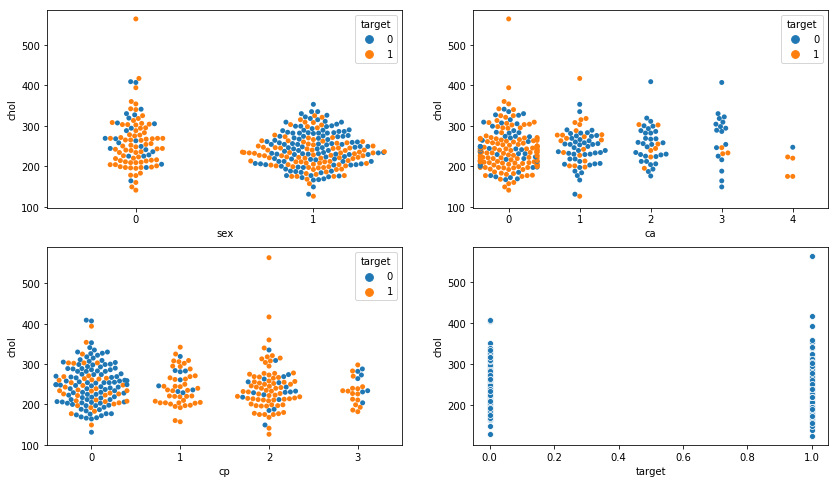

In [14]:
fig,ax=plt.subplots(2,2,figsize=(14,8))
sns.swarmplot(y='chol',x='sex',hue='target',data=dt,ax=ax[0,0])
sns.swarmplot(y='chol',x='cp',hue='target',data=dt,ax=ax[1,0])
sns.swarmplot(y='chol',x='ca',hue='target',data=dt,ax=ax[0,1])
sns.scatterplot(x=dt['target'],y=dt['chol'],ax=ax[1,1])

From last plot we can conclude that cholestral levels won't effect the heart disease much and "Females has more cholestral when compared to men and if number of major vessels are zero has more prone to heart diseases and we can get many useful insights from the above plots

<h3>Now Explore  Oldpeak (continuous feature) </h3>

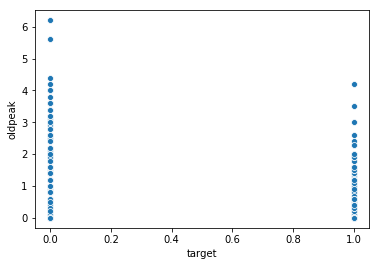

In [15]:
sns.scatterplot(x=dt['target'],y=dt['oldpeak'])

So above graph shows that if the person has high old peak he is less prone to heart diseases in the similar way we can check with other categorical variables vs this feature to get more insights.


Now Let's see Exploration as a whole dataset:-

To see the distribution of each feature we can either use histogram or density plot(kde plots or smoothen histograms)

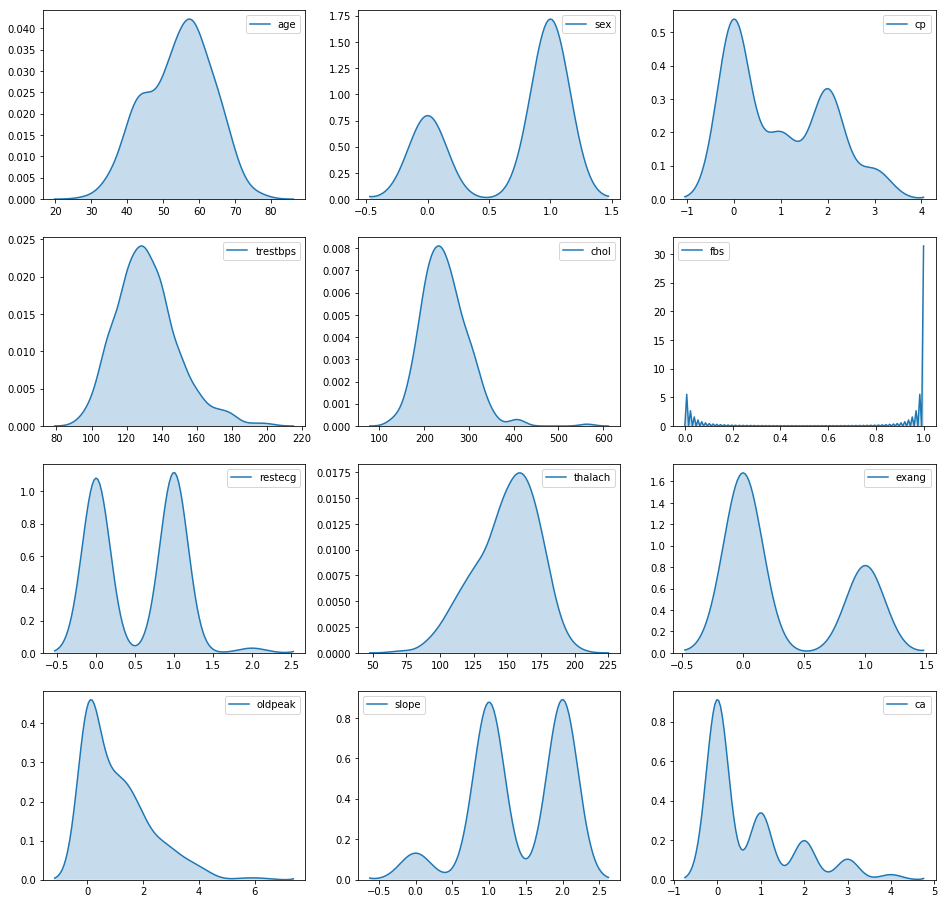

In [16]:
fig,ax=plt.subplots(4,3,figsize=(16,16))
for i in range(12):
    plt.subplot(4,3,i+1)
    sns.kdeplot(data=dt.iloc[:,i],shade=True)

Now we can check how the distributions are there in each feature and we can also find the values which are most occuring in each feature. 

And that's not it you can do much more analysis to get more insights of the data but for now the knowledge we got from analysis is enough to work on....So by checking the similarity between the each of the two features we can stop our analysis.

Before that to apply heatmap we need check all values are there or not...

<h3> Checking missing values</h3>

In [17]:
dt.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Wow .... we can see that there are no null values so we can start our exploration and find the correlation or similarity between features.....

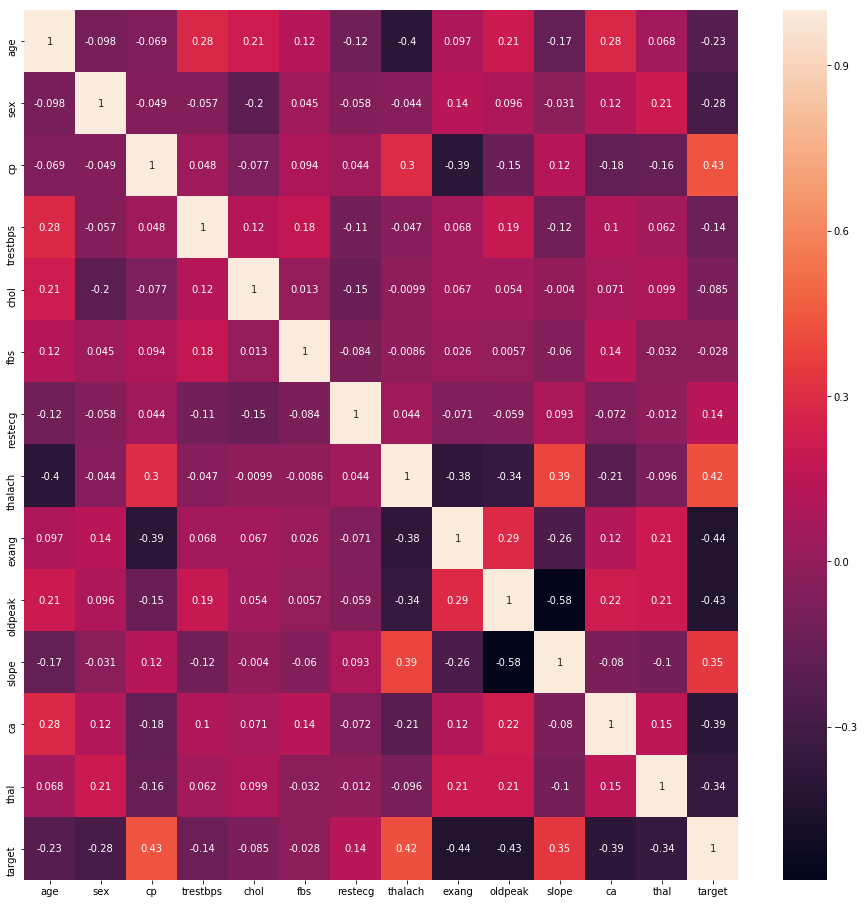

In [18]:
plt.figure(figsize=(16,16))
sns.heatmap(dt.corr(),annot=True)

So from these we can tell which two features are highly related and which are not....and we can see that most values are positives it shows most features are related to each other.



If you once the check the description of the dataset that we are using we can see that the features given in this dataset are scientifically checked that whether they has any effect on heart diseases and they make sure of removing not useful information of the patients like weight etc..,.. 

So we can leave the steps 2.3)Adding new features and 2.4)Removing redundant features as they are actually done before giving the dataset to us.

In competitions every model accuracy is defined by those steps that is adding new features and removing redundant features(Feature Engineering).I'll tell you a example my model for titanic survival problem(Getting started in ML) in kaggle got around 78percent accuracy how many different algorithms i tried and fine tuned parameters but after careful feature engineering by adding a feature family survival(accuracy rised to 83) and i got upto top 4% from 52% that's how important it is.

That feature engineering you can do only by finding some correlations among given features through analysis by plotting against each other....

Please checkout kaggle mini course (feature engineering)....


Now we do the step 2.5)

<h3>2.5)Converting all the features into suitable forms for modelling:-</h3>

First of all please checkout this wonderful article [Handling categorical data](https://www.datacamp.com/community/tutorials/categorical-data) in which there is detailed explanation on how to convert the categorical into suitable forms for modelling and please checkout that article it is very useful for all your ml models.

**First convert all the features having categorical values into category type:- **

In [19]:
dt.sex=dt.sex.astype('category')
dt.cp=dt.cp.astype('category')
dt.fbs=dt.fbs.astype('category')
dt.restecg=dt.restecg.astype('category')
dt.exang=dt.exang.astype('category')
dt.ca=dt.ca.astype('category')
dt.slope=dt.slope.astype('category')
dt.thal=dt.thal.astype('category')

Now remove the output target column from our dataset

In [20]:
model_label=dt['target']
model_label=pd.DataFrame(model_label)
del dt['target']

Now convert the categorical data into one hot encoding using the get_dummies() function and please check the above said article which tells why we need to do one hot encoding. As the models won't operate on string items we need to make them some numerical values that will be useful for the computer for modelling.

In [21]:
dt1=pd.get_dummies(dt,drop_first=True)
dt1.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


You can see that cp changed to cp_1,cp_2,cp_3 and remaining categorical features are also changed in that way.And drop_first makes it won't show the sex_0 as actually sex will be encoded as (sex_0 representing 0 and sex_1 representing 1 but by dropping sex_0 also we don'y loss any information because still 1 represents male and if sex_1=0 then that means it is other than male that is feamle.

We can see that the features values are on different scales so we need to normalize them because for some algorithms to train the normalised data works very well.

<h3>Normalization (To get value b/w 0 and 1)<h3>

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
dt1_scaled=MinMaxScaler().fit_transform(dt1)
dt1_scaled=pd.DataFrame(data=dt1_scaled, columns=dt1.columns)
dt1_scaled.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Now the data is ready for modelling....So we move to next step

<h3>3.checking for the best algorithm and parameter tuning:-</h3>

<h4>First let's do the train test split:</h4>

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dt1_scaled,model_label,random_state=25,stratify=model_label)#stratify makes equal proportions to go onto both sets

Now after training each model we will evaluate that model simantenuosly...... [model evalution](https://www.coursera.org/learn/python-machine-learning?specialization=data-science-python) check the week-3 of this course to get in depth knowledge on model evalution metrics.

Or Please know about ROC curve,Precision recall curve and confusion matrix.......

So now we can move further we will now set our Evalution metrics for our models.

We must understand that always accuracy is not a good metric for evalution.

<h3>Evalution Metrics</h3>

In [24]:
from sklearn.metrics import confusion_matrix#matrix of true positives,true negatives,false positives,false negatives...
from sklearn.metrics import precision_recall_curve#x-axis->precision,y-axis->recall where precision means what fraction of +ve predictions are correct and recall means what fraction of positives are correctly identified.
from sklearn.metrics import average_precision_score#weighted mean of precision with weight as increase in the amount of recall from previous one
from sklearn.metrics import roc_curve#x-axis->False positives,y-axis->true positives
from sklearn.metrics import auc#Area under the Roc curve
from sklearn.model_selection import cross_val_score#cross validation score
from sklearn.metrics import f1_score#harmonic mean of precision and recall

To compute cross validation scores and to get plots for precision_recall curve and roc_curve we will define the helper functions for each.

In [25]:
def CrossValidate(dtX,dtY,model,cv=5):#defalut cv=5(folds),model means algorithm that we applied
    score=cross_val_score(model,dtX , dtY, cv=cv, scoring='accuracy')#return scores of all folds
    return(np.mean(score))#taking average of all.

In [26]:
def plotting(true_values,pred_values):
    fig,axe=plt.subplots(1,2,figsize=(12,6))
    precision,recall,threshold = precision_recall_curve(true_values,pred_values[:,1])#returns three arrays of precision,recalls and thresholds with respect to which those are attained
    axe[0].plot(precision,recall,'r--')
    axe[0].set_xlabel('Precision')
    axe[0].set_ylabel('Recall')
    axe[0].set_title("Average Precision Score : {}".format(average_precision_score(true_values,pred_values[:,1])))#probabilities of 1's-pred[:,1] means
    fpr,tpr,threshold = roc_curve(true_values,pred_values[:,1])#fpr->false positives,tpr->true positive
    axe[1].plot(fpr,tpr)
    axe[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))#area under curve
    axe[1].set_xlabel('False Positive Rate')
    axe[1].set_ylabel('True Positive Rate')

Now we successfully defined our evalution metrics.....So now let's start training models...

In this notebook i didn't explained the hyperparameter tuning because as if you are novic learner i thought you could explore more things and learn much more if you do that on your own.....

But i will tell you the way how to find best parameters to your solution...

The things you need to learn are 

1)GridSearchCV(Basic)

2)write every algorithm parameters on a paper and work on them.

If you do those things you can build your own awesome models.....

<h3>1)We will start with K-Nearest Neighbors</h3>

0.8184980237154151
0.888888888888889


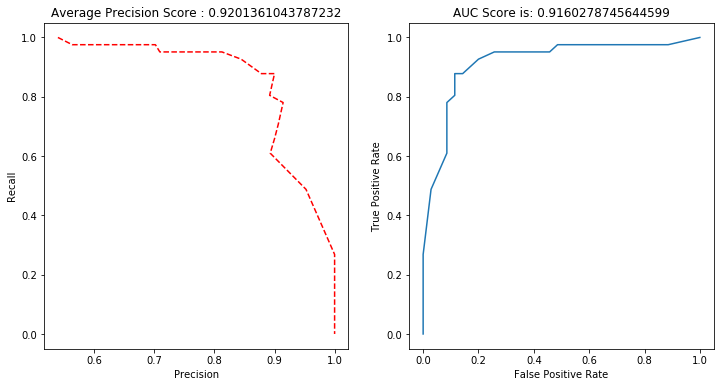

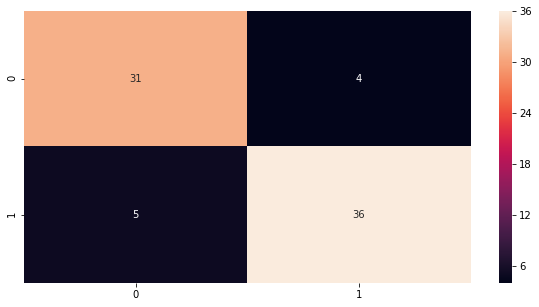

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=18)#Checking different values of n_neighbors gives the maximum of them
knn_score=CrossValidate(X_train,np.ravel(y_train),knn_clf)
print(knn_score)
knn_clf.fit(X_train,np.ravel(y_train))
plotting(y_test,knn_clf.predict_proba(X_test))

#Now calculate F1 scores:-
fig=plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,knn_clf.predict(X_test)),annot=True)
F1_knn=f1_score(y_test,knn_clf.predict(X_test))
print(F1_knn)

Wow....we got great precision and recall values......Now let's checkout other algorithms also.

<h3>2)Logistic Regression</h3>

You might think that it is a regression algorithm but it is not, it is purely an classification algorithm....

0.8054545454545454
0.8915662650602411


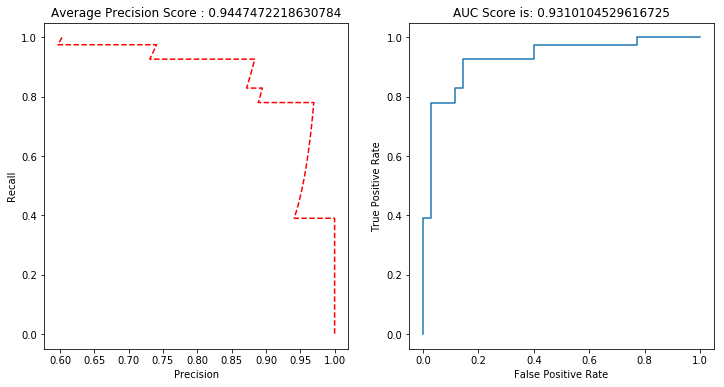

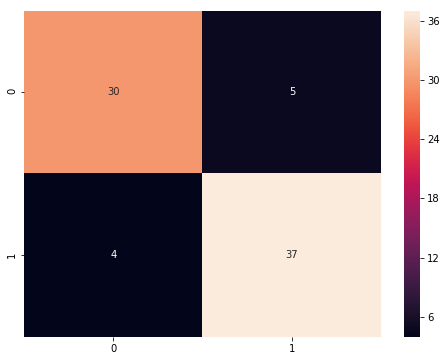

In [28]:
from sklearn.linear_model import LogisticRegression
lg_clf=LogisticRegression(C=10,solver='lbfgs')
lg_score=CrossValidate(X_train,np.ravel(y_train),lg_clf)
print(lg_score)
lg_clf.fit(X_train,np.ravel(y_train))
plotting(np.ravel(y_test),lg_clf.predict_proba(X_test))

fig=plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,lg_clf.predict(X_test)),annot=True)
F1_lg=f1_score(y_test,lg_clf.predict(X_test))
print(F1_lg)

Wow....we got pretty good F1-score,precision and AUC scores....

Next we will train against the Decision Tree classifier

<h3>3)Decision Tree Classifier</h3>

0.7307597716293369
0.8181818181818182


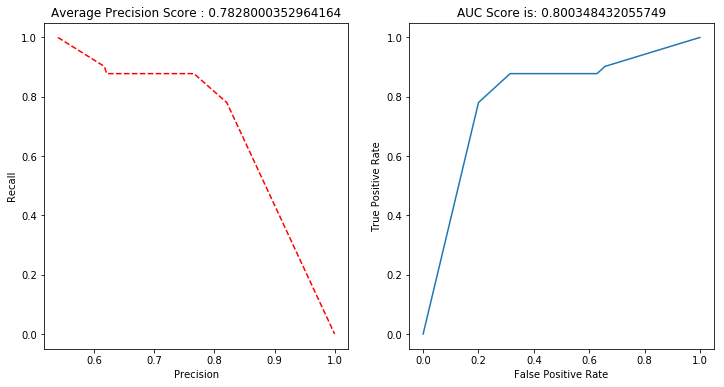

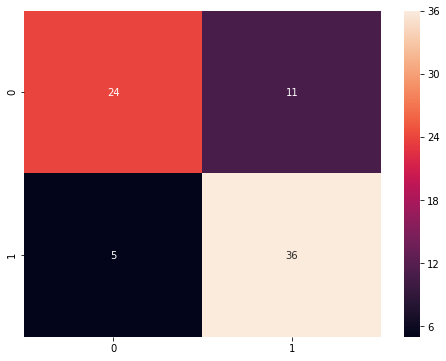

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(max_depth=3)
dt_score=CrossValidate(X_train,np.ravel(y_train),dt_clf)
print(dt_score)
dt_clf.fit(X_train,np.ravel(y_train))
plotting(np.ravel(y_test),dt_clf.predict_proba(X_test))

fig=plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,dt_clf.predict(X_test)),annot=True)
F1_dt=f1_score(y_test,dt_clf.predict(X_test))
print(F1_dt)

<h3>4)Support vector machine</h3>

0.8100966183574879
0.8809523809523809


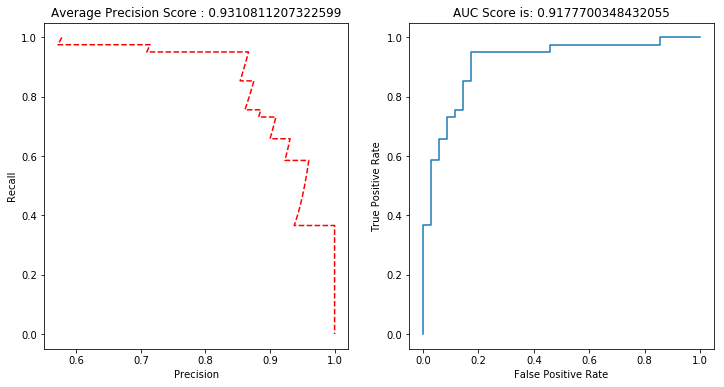

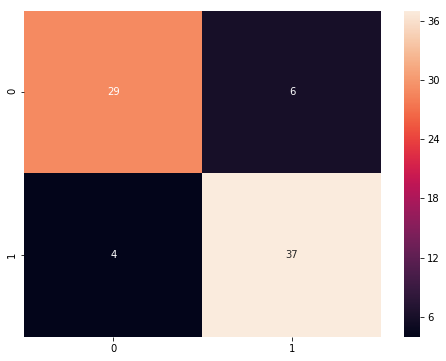

In [30]:
from sklearn.svm import SVC
svm_clf=SVC(kernel='rbf',C=0.1,gamma=0.1,probability=True)#To call Predict_proba we must keep probability as True which makes the output to be given as probability estimates.
svm_score=CrossValidate(X_train,np.ravel(y_train),svm_clf)
print(svm_score)
svm_clf.fit(X_train,np.ravel(y_train))
plotting(np.ravel(y_test),svm_clf.predict_proba(X_test))

fig=plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,svm_clf.predict(X_test)),annot=True)
F1_svm=f1_score(y_test,svm_clf.predict(X_test))
print(F1_svm)

<h3>5)Random Forest Classifier</h3>

0.7520114185331577
0.8641975308641976


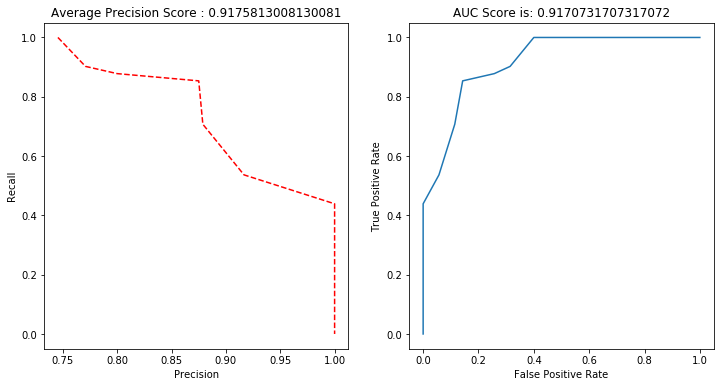

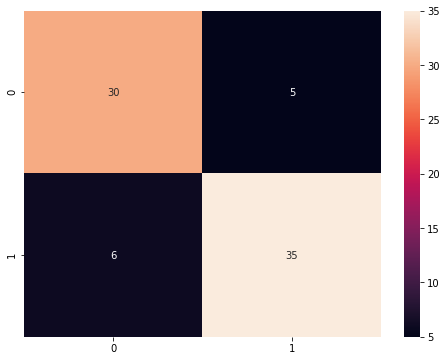

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(max_features=3,random_state=25,n_estimators=10)
rf_score=CrossValidate(X_train,np.ravel(y_train),rf_clf)
print(rf_score)
rf_clf.fit(X_train,np.ravel(y_train))
plotting(np.ravel(y_test),rf_clf.predict_proba(X_test))

fig=plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,rf_clf.predict(X_test)),annot=True)
F1_rf=f1_score(y_test,rf_clf.predict(X_test))
print(F1_rf)

<h3>6)Naive Bayes Classifier</h3>

0.674137022397892
0.5172413793103449


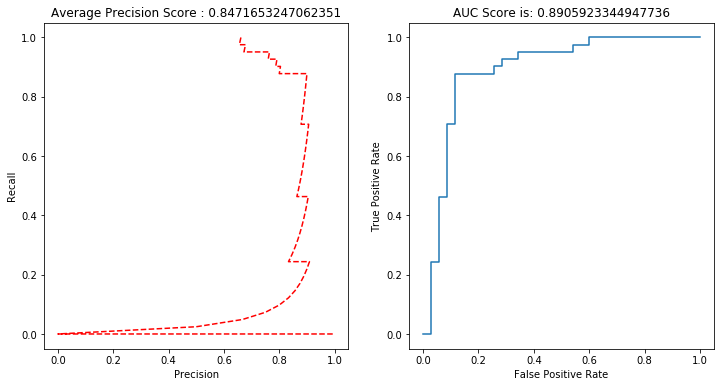

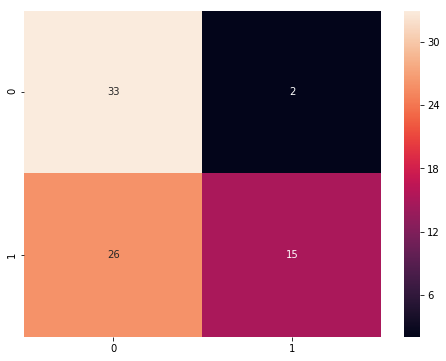

In [32]:
from sklearn.naive_bayes import GaussianNB
nb_clf=GaussianNB()
nb_score=CrossValidate(X_train,np.ravel(y_train),nb_clf)
print(nb_score)
nb_clf.fit(X_train,np.ravel(y_train))
plotting(np.ravel(y_test),nb_clf.predict_proba(X_test))

fig=plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,nb_clf.predict(X_test)),annot=True)
F1_nb=f1_score(y_test,nb_clf.predict(X_test))
print(F1_nb)

<h3>7)Stochastic Gradient Descent</h3>

0.8144444444444444
0.8705882352941177


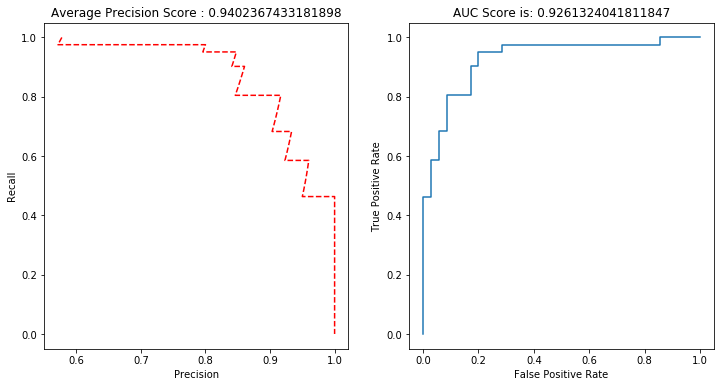

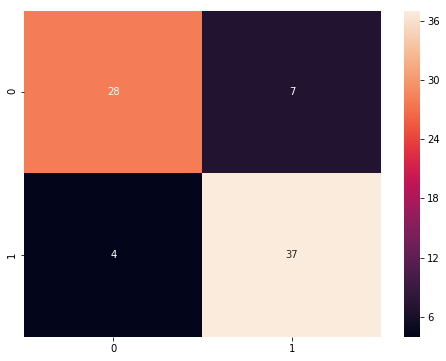

In [33]:
#we can also use batch gradient descent but it takes a lot more time when compared to this as weights gets updated after each batch.
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(alpha=0.3, random_state=37, penalty= "l2",loss='log')#applies l2 regulrazation,we need apply log as loss function to get probablities
sgd_score=CrossValidate(X_train,np.ravel(y_train),sgd_clf)
print(sgd_score)
sgd_clf.fit(X_train,np.ravel(y_train))
plotting(np.ravel(y_test),sgd_clf.predict_proba(X_test))

fig=plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,sgd_clf.predict(X_test)),annot=True)
F1_sgd=f1_score(y_test,sgd_clf.predict(X_test))
print(F1_sgd)

<h3>8)Gradient Boosted Decision Trees</h3>

0.7750285463328941
0.7999999999999999


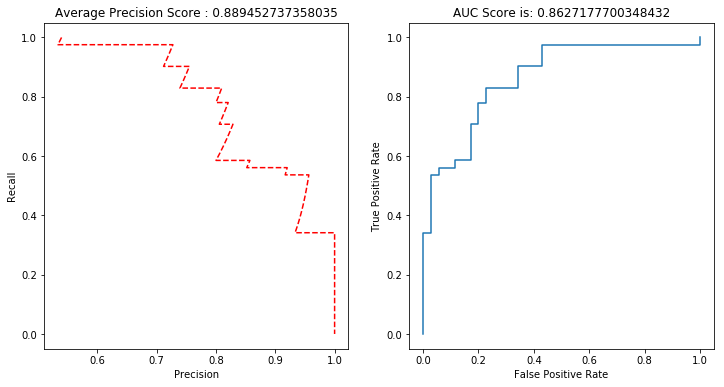

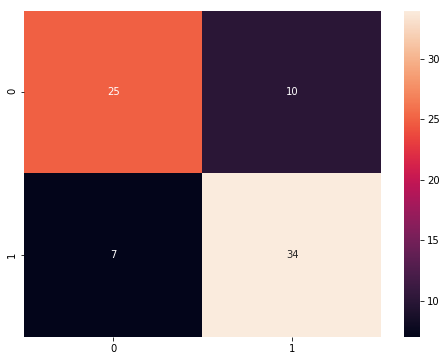

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf=GradientBoostingClassifier(learning_rate=0.1,max_depth=6,n_estimators=150,random_state=0,tol=1e-10)#increasing learning rate will make model more complex.
gb_score=CrossValidate(X_train,np.ravel(y_train),gb_clf)
print(gb_score)
gb_clf.fit(X_train,np.ravel(y_train))
plotting(np.ravel(y_test),gb_clf.predict_proba(X_test))

fig=plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,gb_clf.predict(X_test)),annot=True)
F1_gb=f1_score(y_test,gb_clf.predict(X_test))
print(F1_gb)


<h3>9)Neural Network</h3>

0.7925120772946859
0.7733333333333334


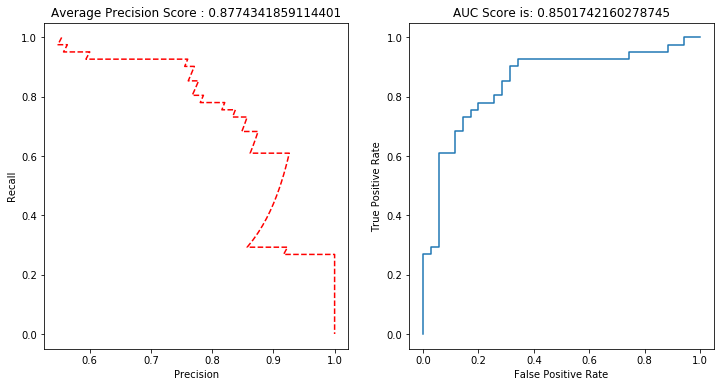

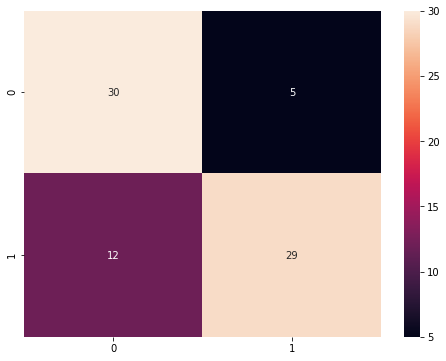

In [35]:
from sklearn.neural_network import MLPClassifier
nn_clf=MLPClassifier(hidden_layer_sizes=[150,100,100,100,100],solver='lbfgs',random_state=20,activation='tanh',alpha=0.01)
nn_score=CrossValidate(X_train,np.ravel(y_train),nn_clf)
print(nn_score)
nn_clf.fit(X_train,np.ravel(y_train))
plotting(np.ravel(y_test),nn_clf.predict_proba(X_test))

fig=plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,nn_clf.predict(X_test)),annot=True)
F1_nn=f1_score(y_test,nn_clf.predict(X_test))
print(F1_nn)


Now well we have trained a lot of models ........ There are other classifiers also like BaggingClassifier,ExtraTree Classifiers etc...,.But random forest gives you the best of all in most cases...So let's stop here...

Now we will see what are the important features......Please check out the mini course in kaggle the machine learning Explainability it is a very wonderful course....

Now let's move....

In [36]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf_clf, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

/opt/conda/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
Using TensorFlow backend.


Weight,Feature
0.0816 ± 0.0609,thal_2
0.0632 ± 0.0421,thalach
0.0500 ± 0.0258,age
0.0474 ± 0.0428,trestbps
0.0447 ± 0.0542,exang_1
0.0447 ± 0.0268,slope_1
0.0421 ± 0.0258,restecg_1
0.0421 ± 0.0349,thal_3
0.0289 ± 0.0307,sex_1
0.0237 ± 0.0307,chol


So the features that contribute more to a heart disease are mainly thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect),oldpeak: ST depression induced by exercise relative to rest, The person's maximum heart rate achieved........Now we will see another feature extraction techinque

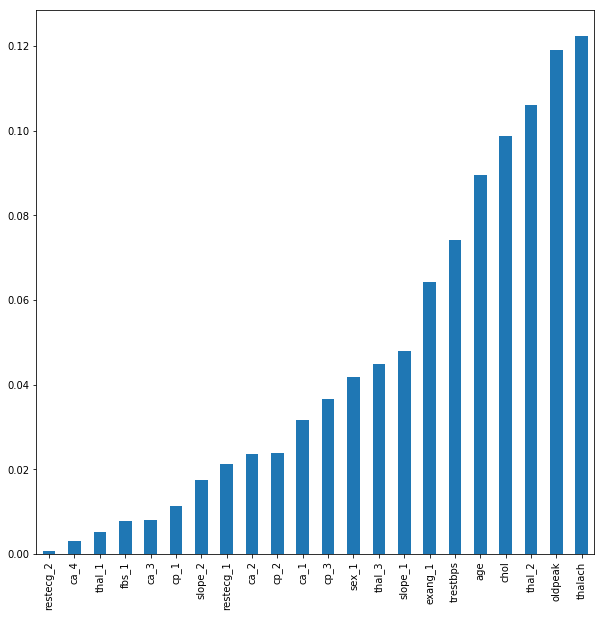

In [37]:
fig= plt.figure(figsize=(10,10))
important_feature=pd.Series(rf_clf.feature_importances_, index=X_train.columns)
important_feature.sort_values().plot.bar()

Yes.....Now we find the same features as important .....So, we can say that maximum heart beat,thalassemia effect greatly.

Now check which models are performing greatly by using plots.

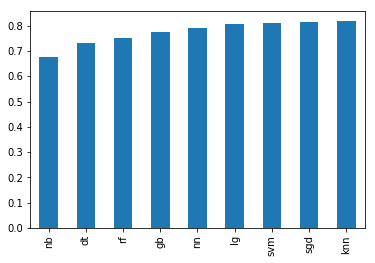

In [38]:
models_accuracy=pd.Series(data=[knn_score,lg_score,dt_score,svm_score,rf_score,nb_score,sgd_score,gb_score,nn_score],index=["knn","lg","dt","svm","rf","nb","sgd","gb","nn"])
models_accuracy.sort_values().plot.bar()

We can say that accuracy vise knn,sgd and svm are doing good but based on accuracy we can't say it is good for classification tasks F1 scores can be good criteria

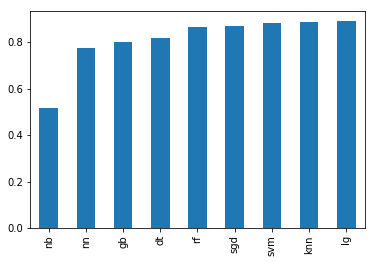

In [39]:
models_accuracy=pd.Series(data=[F1_knn,F1_lg,F1_dt,F1_svm,F1_rf,F1_nb,F1_sgd,F1_gb,F1_nn],index=["knn","lg","dt","svm","rf","nb","sgd","gb","nn"])
models_accuracy.sort_values().plot.bar()

Wow......Neural networks,gaussian boosted,Sgd are doing great and remaining also giving good F1 scores.......

So now we will combine the results of these with Voting classifier

The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses.

<h3>10)Voting Classifier</h3>

0.8187000439174351
0.8780487804878049


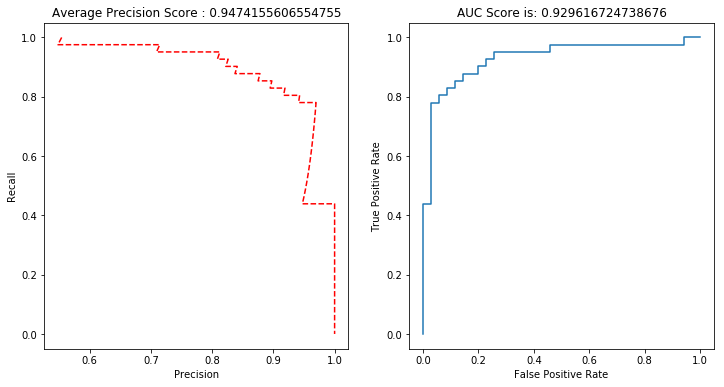

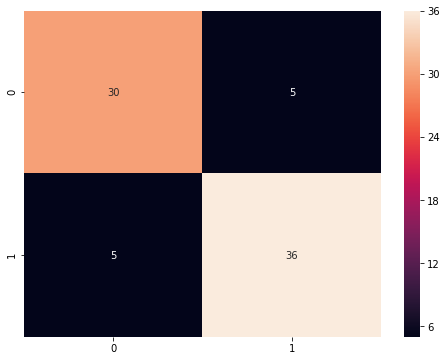

In [40]:
from sklearn.ensemble import VotingClassifier
vc_clf=VotingClassifier(estimators=[('knn',knn_clf),('lg',lg_clf),('sgd',sgd_clf),('svm',svm_clf),('nn',nn_clf)],voting='soft')
vc_score=CrossValidate(X_train,np.ravel(y_train),vc_clf)
print(vc_score)
vc_clf.fit(X_train,np.ravel(y_train))
plotting(np.ravel(y_test),vc_clf.predict_proba(X_test))

fig=plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,vc_clf.predict(X_test)),annot=True)
F1_vc=f1_score(y_test,vc_clf.predict(X_test))
print(F1_vc)

<h2>Summary</h2>

Wow we finally got Average precision score of 95 and AUC 93 which is wonderful with the small dataset we have.......and we got the F1 score nearly as 89.....

So by combining the best models into voting classifier we got the best results on our test set....

We can also ensemble the models into one complex model but it is of not much use when we have a small dataset like we have now ....So it's better using the voting classifier and we got one of the best classifier for heart disease prediction...

I hope you guys like it....If you find it useful upvote it and mention any suggestions and feedback........
